<a href="https://colab.research.google.com/github/theaknankam/HCKI-Praktikum-1-Notebook-Code/blob/main/Praktikum1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ADULT DATASET ANALYSE - EINKOMMENSVORHERSAGE MIT MACHINE LEARNING**
### ============================================================================
### Dieses Skript analysiert den Adult-Datensatz und erstellt ein Modell zur
### Vorhersage, ob eine Person mehr als 50.000$ pro Jahr verdient.
### ============================================================================


In [4]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=9bf14a47d4c30ded0cc4e4f3c29bb5df4c87f2d5f9e2e6557b58c9fece74976a
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [5]:
# ----------------------------------------------------------------------------
# SCHRITT 1: BIBLIOTHEKEN IMPORTIEREN
# ----------------------------------------------------------------------------
# Pandas: Für Datenmanipulation und -analyse
import pandas as pd

# NumPy: Für numerische Berechnungen
import numpy as np

# Matplotlib & Seaborn: Für Datenvisualisierung
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn Komponenten:
from sklearn.model_selection import train_test_split  # Teilt Daten in Training/Test
from sklearn.preprocessing import LabelEncoder  # Wandelt Kategorien in Zahlen um
from sklearn.ensemble import RandomForestClassifier  # Der Machine Learning Algorithmus
from sklearn.utils import resample  # Für Oversampling (Datenbalancierung)

# Metriken zur Modellbewertung:
from sklearn.metrics import (
    classification_report,  # Detaillierter Bericht über Modellleistung
    confusion_matrix,  # Matrix zeigt richtige/falsche Vorhersagen
    accuracy_score,  # Prozentsatz korrekter Vorhersagen
    precision_score,  # Wie viele positive Vorhersagen waren korrekt
    recall_score,  # Wie viele tatsächlich positive wurden gefunden
    f1_score,  # Harmonisches Mittel von Precision und Recall
    roc_curve,  # Daten für ROC-Kurve
    auc,  # Fläche unter der ROC-Kurve
    roc_auc_score  # ROC-AUC Score
)

# LIME: Für Modellerklärungen (erklärt einzelne Vorhersagen)
import lime
import lime.lime_tabular

# XGBoost: Ein weiterer mächtiger ML-Algorithmus
import xgboost

In [6]:
# ----------------------------------------------------------------------------
# SCHRITT 2: DATEN LADEN UND ERSTE INSPEKTION
# ----------------------------------------------------------------------------
# Lädt den Adult-Datensatz aus einer CSV-Datei
# Dieser Datensatz enthält demographische Daten von Personen
data = pd.read_csv("/content/adult.csv")

# Zeigt die Namen aller Spalten (Features) im Datensatz
print("=" * 70)
print("SCHRITT 2: DATENSATZ ÜBERBLICK")
print("=" * 70)
print("\n📋 Spaltennamen:")
print(data.columns)

# Zeigt die ersten 20 Zeilen des Datensatzes
# So können wir sehen, wie die Daten strukturiert sind
print("\n📊 Erste 20 Zeilen des Datensatzes:")
display(data.head(20))

# Zeigt die Form (Dimensionen) des Datensatzes
print(f"\n📏 Datensatz-Größe: {data.shape[0]} Zeilen, {data.shape[1]} Spalten")

SCHRITT 2: DATENSATZ ÜBERBLICK

📋 Spaltennamen:
Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

📊 Erste 20 Zeilen des Datensatzes:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K



📏 Datensatz-Größe: 48842 Zeilen, 15 Spalten


In [7]:
# ----------------------------------------------------------------------------
# SCHRITT 3: DATENAUFBEREITUNG FÜR ERSTES MODELL (XGBOOST)
# ----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("SCHRITT 4: DATEN FÜR XGBOOST-MODELL VORBEREITEN")
print("=" * 70)

# Definiert welche Spalten als Features (Eingabevariablen) verwendet werden
# Diese Features werden verwendet, um das Einkommen vorherzusagen
feature_names = [
    'age',  # Alter
    'workclass',  # Arbeitsklasse (z.B. privat, öffentlich)
    'fnlwgt',  # Gewichtung (census final weight)
    'education',  # Bildungsniveau
    'educational-num',  # Bildung als Zahl
    'marital-status',  # Familienstand
    'occupation',  # Beruf
    'relationship',  # Beziehungsstatus
    'race',  # Ethnische Zugehörigkeit
    'gender',  # Geschlecht
    'capital-gain',  # Kapitalgewinn
    'capital-loss',  # Kapitalverlust
    'hours-per-week',  # Arbeitsstunden pro Woche
    'native-country'  # Herkunftsland
]

# X = Features (Eingabedaten)
# .copy() erstellt eine unabhängige Kopie, um Originaldaten nicht zu verändern
X = data[feature_names].copy()

# y = Target (Zielvariable, was wir vorhersagen wollen)
# Wandelt '<=50K' in 0 und '>50K' in 1 um
# Das ist eine binäre Klassifikation (zwei Klassen)
y = data['income'].map({'<=50K': 0, '>50K': 1})

print(f"✅ Features vorbereitet: {X.shape[1]} Features")
print(f"✅ Target vorbereitet: {y.value_counts().to_dict()}")

# Definiert welche Spalten kategorielle Daten enthalten
# Kategorielle Daten sind nicht-numerische Werte (z.B. "Männlich", "Weiblich")
categorical_columns = [
    'workclass', 'education', 'marital-status', 'occupation',
    'relationship', 'race', 'gender', 'native-country'
]

# Label Encoding: Wandelt Text-Kategorien in Zahlen um
# Zum Beispiel: "Männlich" → 0, "Weiblich" → 1
# Machine Learning Algorithmen können nur mit Zahlen arbeiten
label_encoders = {}  # Dictionary zum Speichern aller Encoder

print("\n🔢 Kodiere kategorielle Variablen:")
for col in categorical_columns:
    # Erstellt einen neuen LabelEncoder für jede Spalte
    le = LabelEncoder()

    # .astype(str) stellt sicher, dass alle Werte als Text behandelt werden
    # fit_transform() lernt die Kategorien und wandelt sie in Zahlen um
    X[col] = le.fit_transform(X[col].astype(str))

    # Speichert den Encoder, falls wir ihn später brauchen
    label_encoders[col] = le
    print(f"  ✓ {col}: {len(le.classes_)} Kategorien → Zahlen 0-{len(le.classes_)-1}")


SCHRITT 4: DATEN FÜR XGBOOST-MODELL VORBEREITEN
✅ Features vorbereitet: 14 Features
✅ Target vorbereitet: {0: 37155, 1: 11687}

🔢 Kodiere kategorielle Variablen:
  ✓ workclass: 9 Kategorien → Zahlen 0-8
  ✓ education: 16 Kategorien → Zahlen 0-15
  ✓ marital-status: 7 Kategorien → Zahlen 0-6
  ✓ occupation: 15 Kategorien → Zahlen 0-14
  ✓ relationship: 6 Kategorien → Zahlen 0-5
  ✓ race: 5 Kategorien → Zahlen 0-4
  ✓ gender: 2 Kategorien → Zahlen 0-1
  ✓ native-country: 42 Kategorien → Zahlen 0-41


In [8]:
# ----------------------------------------------------------------------------
# SCHRITT 5: TRAIN-TEST-SPLIT
# ----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("SCHRITT 5: AUFTEILEN IN TRAININGS- UND TESTDATEN")
print("=" * 70)

# Teilt die Daten in Trainings- und Testsets auf
# - Trainingsdaten: Wird verwendet, um das Modell zu trainieren
# - Testdaten: Wird verwendet, um die Leistung zu bewerten
# test_size=0.5 bedeutet: 50% Training, 50% Test
# random_state=100 stellt sicher, dass die Aufteilung reproduzierbar ist
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.5,  # 50% der Daten für Tests
    random_state=100  # Für Reproduzierbarkeit
)

print(f"📊 Trainingsdaten: {X_train.shape[0]} Beispiele")
print(f"📊 Testdaten: {X_test.shape[0]} Beispiele")
print(f"📊 Verhältnis: {X_train.shape[0]/(X_train.shape[0]+X_test.shape[0])*100:.1f}% Training, {X_test.shape[0]/(X_train.shape[0]+X_test.shape[0])*100:.1f}% Test")


SCHRITT 5: AUFTEILEN IN TRAININGS- UND TESTDATEN
📊 Trainingsdaten: 24421 Beispiele
📊 Testdaten: 24421 Beispiele
📊 Verhältnis: 50.0% Training, 50.0% Test


In [9]:
# ----------------------------------------------------------------------------
# SCHRITT 6: XGBOOST-MODELL TRAINIEREN
# ----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("SCHRITT 6: XGBOOST-MODELL TRAINIEREN")
print("=" * 70)

# Erstellt ein XGBoost-Klassifikationsmodell
# XGBoost ist ein sehr leistungsfähiger Gradient Boosting Algorithmus
model_xgb = xgboost.XGBClassifier()

# Trainiert das Modell mit den Trainingsdaten
# .fit() ist der eigentliche Lernprozess
print("🔄 Trainiere XGBoost-Modell...")
model_xgb.fit(X_train, y_train)
print("✅ Training abgeschlossen!")


SCHRITT 6: XGBOOST-MODELL TRAINIEREN
🔄 Trainiere XGBoost-Modell...
✅ Training abgeschlossen!


In [10]:
# ----------------------------------------------------------------------------
# SCHRITT 7: LIME-EXPLAINER EINRICHTEN
# ----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("SCHRITT 7: LIME-EXPLAINER FÜR MODELLERKLÄRUNGEN")
print("=" * 70)

# Indizes der kategoriellen Features (ihre Position in der Feature-Liste)
# Diese Info braucht LIME, um kategorielle Features richtig zu behandeln
categorical_features = [1, 3, 5, 6, 7, 8, 9, 13]

# Namen der Klassen für bessere Lesbarkeit
class_names = ["<=50K", ">50K"]

# Namen der Kategorien für jedes kategorielle Feature
# Dies hilft LIME, lesbare Erklärungen zu generieren
categorical_names = {
    1: ['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov',
        'Local-gov', 'State-gov', 'Without-pay', 'Never-worked'],
    3: ['Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school',
        'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', 'Masters',
        '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool'],
    5: ['Married-civ-spouse', 'Divorced', 'Never-married', 'Separated',
        'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'],
    6: ['Tech-support', 'Craft-repair', 'Other-service', 'Sales',
        'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners',
        'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Armed-Forces'],
    7: ['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried'],
    8: ['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black'],
    9: ['Female', 'Male'],
    13: ['United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada',
         'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece',
         'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy',
         'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland',
         'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti',
         'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand',
         'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong',
         'Holand-Netherlands']
}

# Erstellt den LIME Explainer
# LimeTabularExplainer erklärt Vorhersagen für tabellarische Daten
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,  # Trainingsdaten (als NumPy-Array)
    feature_names=feature_names,  # Namen der Features
    class_names=class_names,  # Namen der Klassen
    categorical_features=categorical_features,  # Welche Features sind kategoriell
    categorical_names=categorical_names,  # Namen der Kategorien
    kernel_width=3  # Breite des Kernels für lokale Approximation
)

print("✅ LIME-Explainer erstellt")


SCHRITT 7: LIME-EXPLAINER FÜR MODELLERKLÄRUNGEN
✅ LIME-Explainer erstellt



SCHRITT 8: EINZELNE VORHERSAGE MIT LIME ERKLÄREN
🎯 Tatsächliches Label: >50K
🤖 Modellvorhersage: >50K

📊 Visualisiere LIME-Erklärung...


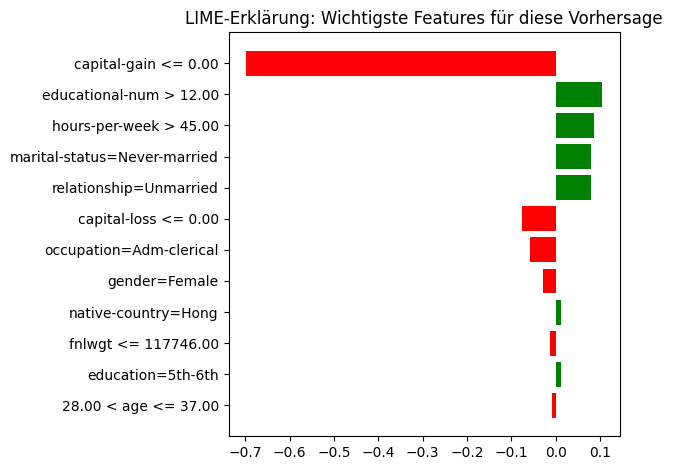

In [11]:
# ----------------------------------------------------------------------------
# SCHRITT 8: EINE VORHERSAGE ERKLÄREN
# ----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("SCHRITT 8: EINZELNE VORHERSAGE MIT LIME ERKLÄREN")
print("=" * 70)

# Wählt das erste Beispiel aus den Testdaten
idx = 0

# Erstellt eine Erklärung für diese spezifische Vorhersage
# explain_instance() zeigt, welche Features zur Vorhersage beigetragen haben
exp = explainer.explain_instance(
    X_test.values[idx],  # Das zu erklärende Beispiel
    model_xgb.predict_proba,  # Vorhersagefunktion des Modells
    num_features=12  # Anzahl der wichtigsten Features in der Erklärung
)

# Zeigt das tatsächliche Label (Ground Truth)
print(f"🎯 Tatsächliches Label: {'<=50K' if y_test.iloc[idx] == 0 else '>50K'}")

# Zeigt die Modellvorhersage
prediction = model_xgb.predict([X_test.values[idx]])[0]
print(f"🤖 Modellvorhersage: {'<=50K' if prediction == 0 else '>50K'}")

# Zeigt die Erklärung im Notebook (falls in Jupyter/Colab)
# exp.show_in_notebook()

# Zeigt die Erklärung als Matplotlib-Figur
print("\n📊 Visualisiere LIME-Erklärung...")
exp.as_pyplot_figure()
plt.title("LIME-Erklärung: Wichtigste Features für diese Vorhersage")
plt.tight_layout()
plt.show()



SCHRITT 9: DATENVISUALISIERUNG - VERTEILUNGEN


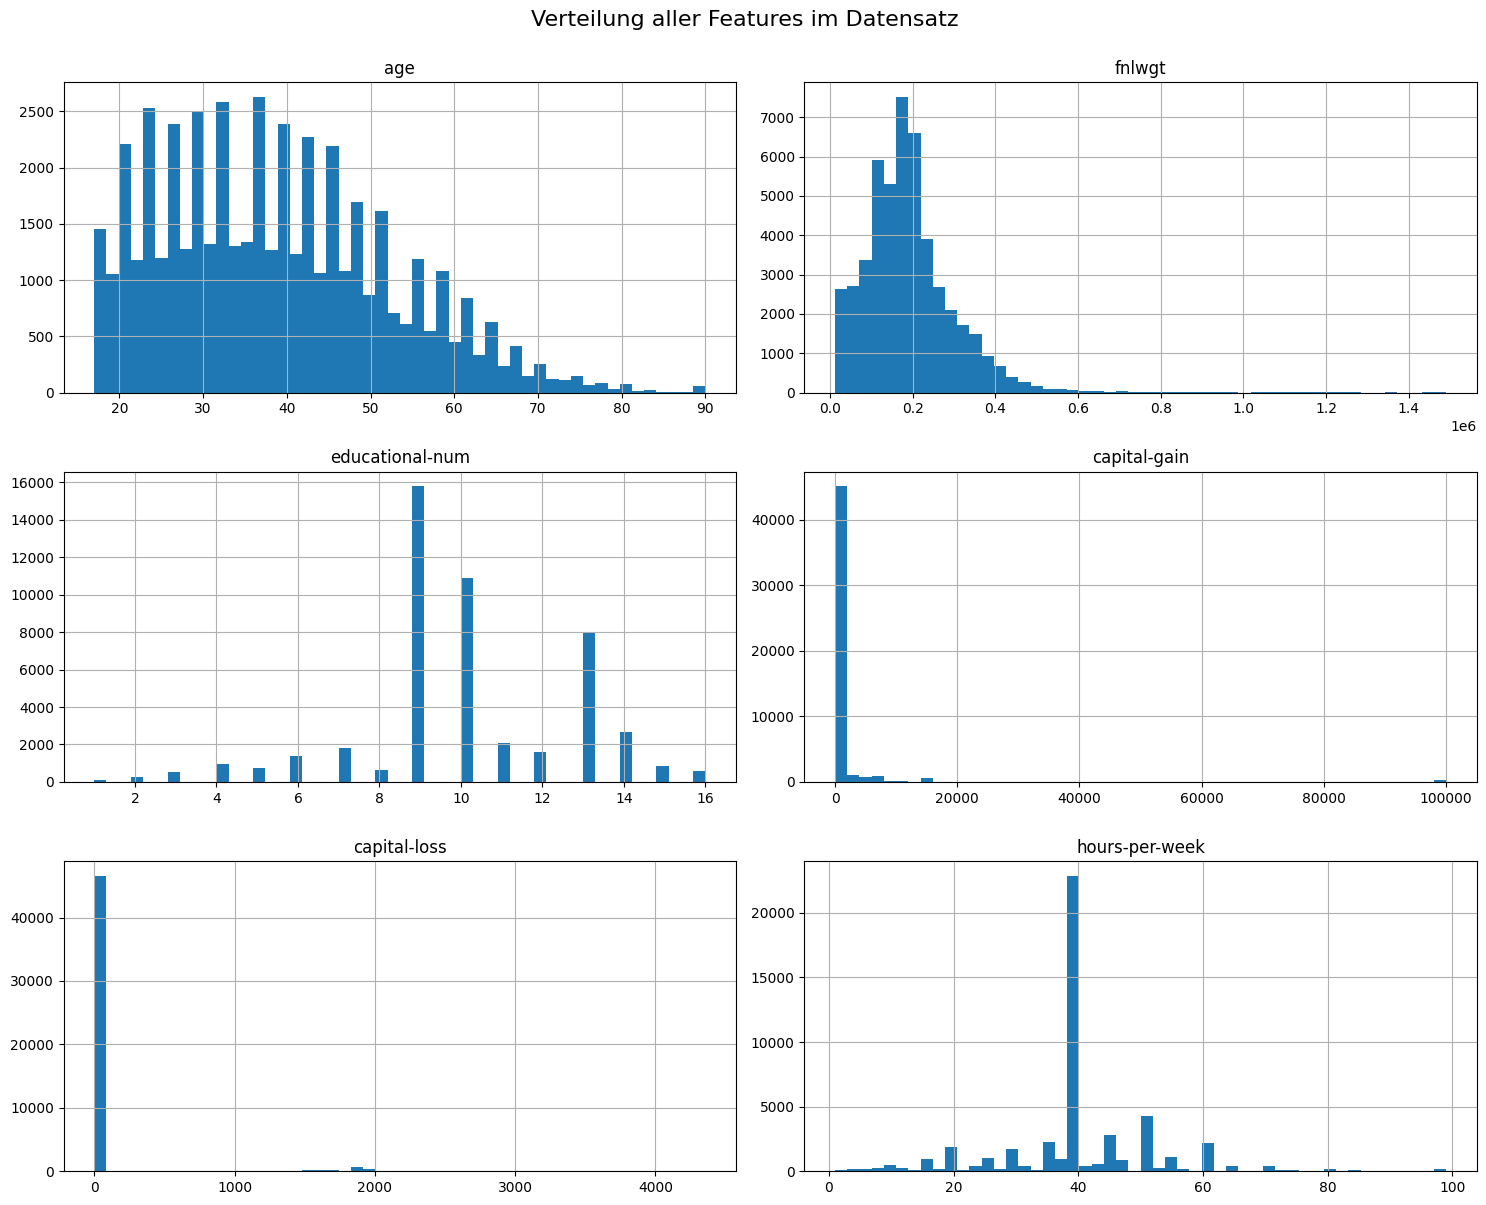

📊 Datensatz-Form: (48842, 15)
📋 Spalten: ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [12]:
# ----------------------------------------------------------------------------
# SCHRITT 9: DATENVISUALISIERUNG - HISTOGRAMME
# ----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("SCHRITT 9: DATENVISUALISIERUNG - VERTEILUNGEN")
print("=" * 70)

# Erstellt Histogramme für alle numerischen Spalten
# Histogramme zeigen die Verteilung der Werte
data.hist(bins=50, figsize=(15, 12))
plt.suptitle('Verteilung aller Features im Datensatz', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

print(f"📊 Datensatz-Form: {data.shape}")
print(f"📋 Spalten: {data.columns.tolist()}")


SCHRITT 10: KORRELATIONSANALYSE


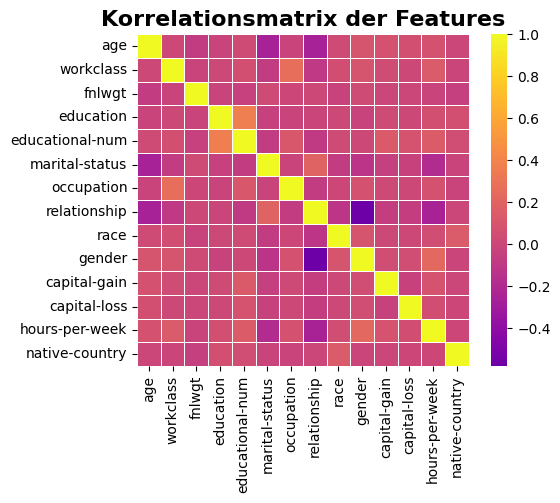

In [24]:
# ----------------------------------------------------------------------------
# SCHRITT 10: KORRELATIONSMATRIX
# ----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("SCHRITT 10: KORRELATIONSANALYSE")
print("=" * 70)

# Berechnet die Korrelationsmatrix
# Korrelation misst, wie stark zwei Variablen zusammenhängen
# Werte nahe +1: starke positive Korrelation
# Werte nahe -1: starke negative Korrelation
# Werte nahe 0: keine Korrelation
corr_matrix = data.corr(numeric_only=True)

# Visualisiert die Korrelationsmatrix als Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    X.corr(),  # Korrelationsmatrix der Features
    annot=False,  # Keine Zahlenwerte in den Zellen (zu viele Features)
    cmap='plasma',  # Farbschema: rot=positiv, blau=negativ
    center=0,  # Zentriert die Farbskala bei 0
    square=True,  # Quadratische Zellen
    linewidths=0.5,  # Linienbreite zwischen Zellen


)
plt.title('Korrelationsmatrix der Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [14]:
# ----------------------------------------------------------------------------
# SCHRITT 11: RANDOM FOREST MIT CLASS BALANCING
# ----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("SCHRITT 11: RANDOM FOREST MODELL TRAINIEREN")
print("=" * 70)

# Erstellt ein Random Forest Klassifikationsmodell
# Random Forest ist ein Ensemble-Algorithmus, der viele Entscheidungsbäume kombiniert
# class_weight='balanced': Gleicht unbalancierte Klassen automatisch aus
# random_state=42: Für Reproduzierbarkeit
# n_estimators=100: Anzahl der Bäume im Wald
model_rf = RandomForestClassifier(
    class_weight='balanced',  # Behandelt unbalancierte Klassen
    random_state=42,  # Für Reproduzierbarkeit
    n_estimators=100  # 100 Bäume im Wald
)

print("🌲 Trainiere Random Forest Modell (100 Bäume)...")
model_rf.fit(X_train, y_train)
print("✅ Training abgeschlossen!")

# Macht Vorhersagen auf den Testdaten
y_pred = model_rf.predict(X_test)
print("Vorhersagesuf Testdaten: " + str(y_pred))

# Vorhersage-Wahrscheinlichkeiten (für ROC-Kurve)
y_pred_proba = model_rf.predict_proba(X_test)
print("Vorhersage-Wahrscheinlichkeiten: " + str(y_pred_proba[:3]))


SCHRITT 11: RANDOM FOREST MODELL TRAINIEREN
🌲 Trainiere Random Forest Modell (100 Bäume)...
✅ Training abgeschlossen!
Vorhersagesuf Testdaten: [1 0 0 ... 0 0 0]
Vorhersage-Wahrscheinlichkeiten: [[0.21 0.79]
 [0.97 0.03]
 [1.   0.  ]]


In [15]:
# ----------------------------------------------------------------------------
# SCHRITT 12: MODELL-EVALUATION
# ----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("SCHRITT 12: RANDOM FOREST - LEISTUNGSMETRIKEN")
print("=" * 70)

# ACCURACY (Genauigkeit): Anteil korrekter Vorhersagen
# Formel: (Richtig Positiv + Richtig Negativ) / Alle Vorhersagen
accuracy = accuracy_score(y_test, y_pred)
print(f"📊 Accuracy (Genauigkeit): {accuracy:.4f} ({accuracy*100:.2f}%)")
print("   → Von allen Vorhersagen sind {:.2f}% korrekt".format(accuracy*100))

# PRECISION (Präzision): Von allen positiven Vorhersagen, wie viele waren richtig?
# Formel: Richtig Positiv / (Richtig Positiv + Falsch Positiv)
precision = precision_score(y_test, y_pred)
print(f"\n🎯 Precision (Präzision): {precision:.4f}")
print("   → Wenn das Modell '>50K' vorhersagt, ist es in {:.2f}% der Fälle richtig".format(precision*100))

# RECALL (Sensitivität/Trefferquote): Von allen tatsächlich positiven, wie viele wurden gefunden?
# Formel: Richtig Positiv / (Richtig Positiv + Falsch Negativ)
recall = recall_score(y_test, y_pred)
print(f"\n🔍 Recall (Trefferquote): {recall:.4f}")
print("   → Von allen Personen mit >50K Einkommen werden {:.2f}% erkannt".format(recall*100))

# F1-SCORE: Harmonisches Mittel von Precision und Recall
# Nützlich wenn man beide Metriken ausbalancieren will
# Formel: 2 * (Precision * Recall) / (Precision + Recall)
f1 = f1_score(y_test, y_pred)
print(f"\n⚖️ F1-Score: {f1:.4f}")
print("   → Balance zwischen Präzision und Trefferquote")

# ROC-AUC SCORE: Fläche unter der ROC-Kurve
# Misst die Fähigkeit des Modells, zwischen Klassen zu unterscheiden
# 1.0 = perfekt, 0.5 = zufällig
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
print(f"\n📈 ROC-AUC Score: {roc_auc:.4f}")
print("   → Je näher an 1.0, desto besser die Klassifikationsfähigkeit")

# CLASSIFICATION REPORT: Detaillierter Bericht für beide Klassen
print("\n📋 Detaillierter Classification Report (als Tabelle):")
# Generiert den Bericht als Dictionary und konvertiert ihn in einen DataFrame
report_dict = classification_report(y_test, y_pred, target_names=['<=50K', '>50K'], output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
display(report_df)



SCHRITT 12: RANDOM FOREST - LEISTUNGSMETRIKEN
📊 Accuracy (Genauigkeit): 0.8578 (85.78%)
   → Von allen Vorhersagen sind 85.78% korrekt

🎯 Precision (Präzision): 0.7460
   → Wenn das Modell '>50K' vorhersagt, ist es in 74.60% der Fälle richtig

🔍 Recall (Trefferquote): 0.6120
   → Von allen Personen mit >50K Einkommen werden 61.20% erkannt

⚖️ F1-Score: 0.6724
   → Balance zwischen Präzision und Trefferquote

📈 ROC-AUC Score: 0.9058
   → Je näher an 1.0, desto besser die Klassifikationsfähigkeit

📋 Detaillierter Classification Report (als Tabelle):


,precision,recall,f1-score,support
<=50K,0.885009,0.934781,0.909215,18599.000000
>50K,0.746022,0.611989,0.672391,5822.000000
accuracy,0.857827,0.857827,0.857827,0.857827
macro avg,0.815515,0.773385,0.790803,24421.000000
weighted avg,0.851874,0.857827,0.852755,24421.000000



SCHRITT 13: ERSTELLE UMFANGREICHE VISUALISIERUNGEN


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


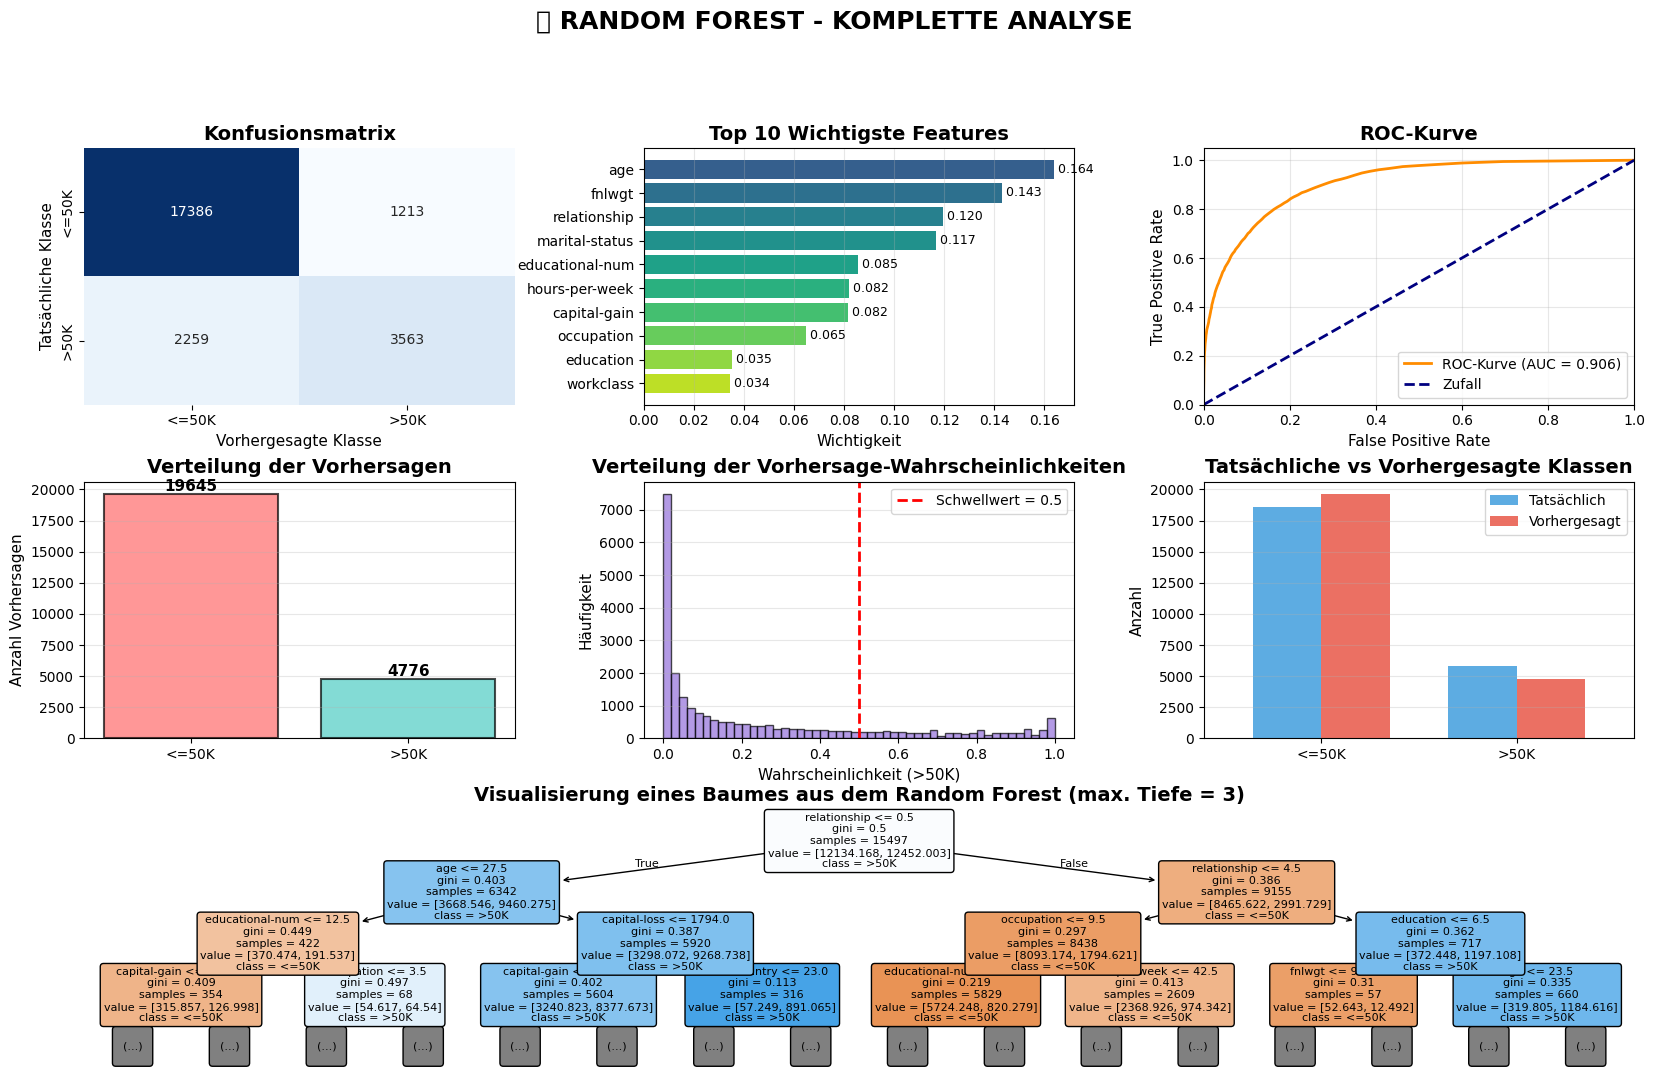

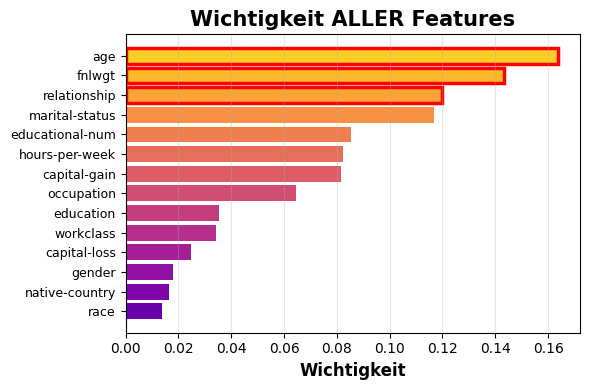


✅ Visualisierungen abgeschlossen!
📈 Anzahl Bäume im Wald: 100
🌳 Maximale Baumtiefe: Unbegrenzt


In [23]:
# ----------------------------------------------------------------------------
# SCHRITT 13: UMFANGREICHE VISUALISIERUNGEN
# ----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("SCHRITT 13: ERSTELLE UMFANGREICHE VISUALISIERUNGEN")
print("=" * 70)

# Erstellt eine große Figur mit mehreren Subplots
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# --- SUBPLOT 1: CONFUSION MATRIX (Konfusionsmatrix) ---
# Zeigt, wie viele Vorhersagen richtig/falsch waren
ax1 = fig.add_subplot(gs[0, 0])
cm = confusion_matrix(y_test, y_pred)

# Heatmap der Konfusionsmatrix
sns.heatmap(
    cm,
    annot=True,  # Zeigt Zahlen in den Zellen
    fmt='d',  # Format: Ganzzahl
    cmap='Blues',  # Farbschema
    cbar=False,  # Keine Farbskala
    ax=ax1,
    xticklabels=['<=50K', '>50K'],
    yticklabels=['<=50K', '>50K']
)
ax1.set_title('Konfusionsmatrix', fontsize=14, fontweight='bold')
ax1.set_ylabel('Tatsächliche Klasse', fontsize=11)
ax1.set_xlabel('Vorhergesagte Klasse', fontsize=11)

# --- SUBPLOT 2: FEATURE IMPORTANCE (Merkmalswichtigkeit) ---
# Zeigt, welche Features am wichtigsten für das Modell sind
ax2 = fig.add_subplot(gs[0, 1])

# Erstellt DataFrame mit Feature-Namen und deren Wichtigkeit
feature_imp = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_rf.feature_importances_
}).sort_values('importance', ascending=False).head(10)  # Top 10

# Erstellt horizontales Balkendiagramm
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(feature_imp)))
bars = ax2.barh(range(len(feature_imp)), feature_imp['importance'], color=colors)
ax2.set_yticks(range(len(feature_imp)))
ax2.set_yticklabels(feature_imp['feature'])
ax2.invert_yaxis()  # Höchste Wichtigkeit oben
ax2.set_xlabel('Wichtigkeit', fontsize=11)
ax2.set_title('Top 10 Wichtigste Features', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Fügt Wichtigkeitswerte an Balken hinzu
for i, (bar, val) in enumerate(zip(bars, feature_imp['importance'])):
    ax2.text(val, i, f' {val:.3f}', va='center', fontsize=9)

# --- SUBPLOT 3: ROC CURVE (ROC-Kurve) ---
# Zeigt Trade-off zwischen True Positive Rate und False Positive Rate
ax3 = fig.add_subplot(gs[0, 2])

# Berechnet ROC-Kurve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc_val = auc(fpr, tpr)

# Plottet ROC-Kurve
ax3.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC-Kurve (AUC = {roc_auc_val:.3f})')
# Diagonale = Zufälliges Raten
ax3.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Zufall')
ax3.set_xlim([0.0, 1.0])
ax3.set_ylim([0.0, 1.05])
ax3.set_xlabel('False Positive Rate', fontsize=11)
ax3.set_ylabel('True Positive Rate', fontsize=11)
ax3.set_title('ROC-Kurve', fontsize=14, fontweight='bold')
ax3.legend(loc="lower right", fontsize=10)
ax3.grid(alpha=0.3)

# --- SUBPLOT 4: VORHERSAGEVERTEILUNG ---
# Zeigt, wie viele Vorhersagen pro Klasse gemacht wurden
ax4 = fig.add_subplot(gs[1, 0])
pred_counts = pd.Series(y_pred).value_counts().sort_index()
colors_pred = ['#FF6B6B', '#4ECDC4']
bars = ax4.bar(pred_counts.index, pred_counts.values, color=colors_pred,
               alpha=0.7, edgecolor='black', linewidth=1.5)
ax4.set_xticks([0, 1])
ax4.set_xticklabels(['<=50K', '>50K'])
ax4.set_ylabel('Anzahl Vorhersagen', fontsize=11)
ax4.set_title('Verteilung der Vorhersagen', fontsize=14, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# Fügt Zahlenwerte auf Balken hinzu
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom',
            fontsize=11, fontweight='bold')

# --- SUBPLOT 5: WAHRSCHEINLICHKEITSVERTEILUNG ---
# Zeigt die Verteilung der vorhergesagten Wahrscheinlichkeiten
ax5 = fig.add_subplot(gs[1, 1])
ax5.hist(y_pred_proba[:, 1], bins=50, color='mediumpurple',
         edgecolor='black', alpha=0.7)
ax5.axvline(0.5, color='red', linestyle='--', linewidth=2,
            label='Schwellwert = 0.5')
ax5.set_xlabel('Wahrscheinlichkeit (>50K)', fontsize=11)
ax5.set_ylabel('Häufigkeit', fontsize=11)
ax5.set_title('Verteilung der Vorhersage-Wahrscheinlichkeiten',
              fontsize=14, fontweight='bold')
ax5.legend(fontsize=10)
ax5.grid(axis='y', alpha=0.3)

# --- SUBPLOT 6: VERGLEICH TATSÄCHLICH VS VORHERGESAGT ---
# Vergleicht die Verteilung der tatsächlichen Labels mit den Vorhersagen
ax6 = fig.add_subplot(gs[1, 2])
comparison = pd.DataFrame({
    'Tatsächlich': y_test.value_counts().sort_index(),
    'Vorhergesagt': pred_counts
})
comparison.plot(kind='bar', ax=ax6, color=['#3498db', '#e74c3c'],
                alpha=0.8, width=0.7)
ax6.set_xticklabels(['<=50K', '>50K'], rotation=0)
ax6.set_ylabel('Anzahl', fontsize=11)
ax6.set_title('Tatsächliche vs Vorhergesagte Klassen',
              fontsize=14, fontweight='bold')
ax6.legend(['Tatsächlich', 'Vorhergesagt'], fontsize=10)
ax6.grid(axis='y', alpha=0.3)

# --- SUBPLOT 7: ENTSCHEIDUNGSBAUM VISUALISIERUNG ---
# Zeigt einen der Bäume aus dem Random Forest
from sklearn.tree import plot_tree

ax7 = fig.add_subplot(gs[2, :])
plot_tree(
    model_rf.estimators_[0],  # Erster Baum aus dem Wald
    max_depth=3,  # Nur die ersten 3 Ebenen zeigen
    feature_names=X_train.columns,
    class_names=['<=50K', '>50K'],
    filled=True,  # Färbt Knoten nach Mehrheitsklasse
    rounded=True,  # Abgerundete Kanten
    fontsize=8,
    ax=ax7
)
ax7.set_title('Visualisierung eines Baumes aus dem Random Forest (max. Tiefe = 3)',
              fontsize=14, fontweight='bold', pad=10)

plt.suptitle('🌲 RANDOM FOREST - KOMPLETTE ANALYSE',
             fontsize=18, fontweight='bold', y=0.995)
plt.show()

# Detaillierte Feature Importance für ALLE Features
fig, ax = plt.subplots(figsize=(6, 4))

all_features = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_rf.feature_importances_
}).sort_values('importance', ascending=True)  # Aufsteigend für bessere Lesbarkeit

colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(all_features)))
bars = ax.barh(range(len(all_features)), all_features['importance'], color=colors)
ax.set_yticks(range(len(all_features)))
ax.set_yticklabels(all_features['feature'], fontsize=9)
ax.set_xlabel('Wichtigkeit', fontsize=12, fontweight='bold')
ax.set_title('Wichtigkeit ALLER Features', fontsize=15, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Hebt die Top 3 Features hervor
top_3_idx = list(range(len(all_features)))[-3:]
for idx in top_3_idx:
    bars[idx].set_edgecolor('red')
    bars[idx].set_linewidth(2.5)

plt.tight_layout()
plt.show()

print("\n✅ Visualisierungen abgeschlossen!")
print(f"📈 Anzahl Bäume im Wald: {model_rf.n_estimators}")
print(f"🌳 Maximale Baumtiefe: {model_rf.max_depth if model_rf.max_depth else 'Unbegrenzt'}")


In [17]:
# ============================================================================
# SCHRITT 14: DATENAUFBEREITUNG MIT OVERSAMPLING
# ============================================================================
print("\n" + "=" * 70)
print("SCHRITT 14: DATENAUFBEREITUNG MIT OVERSAMPLING (BALANCIERUNG)")
print("=" * 70)

# Lädt die Daten erneut für saubere Verarbeitung
data2 = pd.read_csv("/content/adult.csv")

# Entfernt führende/nachfolgende Leerzeichen in allen Text-Spalten
# .strip() entfernt Leerzeichen am Anfang und Ende
# Dies verhindert Probleme beim Encoding (z.B. " Male" vs "Male")
data2 = data2.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
print("✅ Leerzeichen in Text-Spalten entfernt")

# Findet alle kategoriellen (nicht numerische) Spalten
categorical_cols = data2.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('income')  # Target-Variable ausschließen
print(f"📋 Gefundene kategorielle Spalten: {len(categorical_cols)}")

# Encodiert alle kategoriellen Spalten
label_encoders_2 = {}
for col in categorical_cols:
    le = LabelEncoder()
    data2[col] = le.fit_transform(data2[col])
    label_encoders_2[col] = le
print("✅ Alle kategoriellen Variablen kodiert")

# Encodiert die Target-Variable
le_income = LabelEncoder()
data2['income'] = le_income.fit_transform(data2['income'])
print("✅ Target-Variable 'income' kodiert")

# Trennt Features und Target
X_new = data2.drop('income', axis=1)
y_new = data2['income']

# Train-Test-Split mit Stratifizierung
# stratify=y_new stellt sicher, dass beide Klassen proportional verteilt sind
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new,
    test_size=0.5,  # 50% für Tests
    stratify=y_new,  # Behält Klassenverhältnis bei
    random_state=42
)

print("\n📊 Klassenverteilung VOR Oversampling:")
print(y_train_new.value_counts())
print(f"   Verhältnis: {y_train_new.value_counts()[1]} / {y_train_new.value_counts()[0]} = {y_train_new.value_counts()[1]/y_train_new.value_counts()[0]:.2f}")

# OVERSAMPLING: Balanciert unausgeglichene Klassen
# Kombination von Features und Target für Resampling
train_data = pd.concat([X_train_new, y_train_new], axis=1)

# Teilt Daten nach Klassen
# Klasse 0: <=50K (Mehrheitsklasse)
# Klasse 1: >50K (Minderheitsklasse)
class_0 = train_data[train_data['income'] == 0]
class_1 = train_data[train_data['income'] == 1]

print(f"\n🔄 Führe Oversampling durch...")
print(f"   Klasse 0 (<=50K): {len(class_0)} Beispiele")
print(f"   Klasse 1 (>50K): {len(class_1)} Beispiele")

# Oversampling der Minderheitsklasse
# resample() zieht zufällig Beispiele MIT Zurücklegen
# n_samples=len(class_0) → Klasse 1 wird auf Größe von Klasse 0 vergrößert
class_1_oversampled = resample(
    class_1,
    replace=True,  # Mit Zurücklegen (Duplikate erlaubt)
    n_samples=len(class_0),  # Gleiche Anzahl wie Mehrheitsklasse
    random_state=42
)

print(f"   Klasse 1 nach Oversampling: {len(class_1_oversampled)} Beispiele")

# Kombiniert beide Klassen
train_resampled = pd.concat([class_0, class_1_oversampled])

# Trennt wieder in Features und Target
X_resampled = train_resampled.drop('income', axis=1)
y_resampled = train_resampled['income']

print("\n📊 Klassenverteilung NACH Oversampling:")
print(y_resampled.value_counts())
print(f"   Verhältnis: {y_resampled.value_counts()[1]} / {y_resampled.value_counts()[0]} = {y_resampled.value_counts()[1]/y_resampled.value_counts()[0]:.2f}")

print(f"\n📏 Datengrößen:")
print(f"   X_train vorher: {X_train_new.shape}")
print(f"   X_resampled nachher: {X_resampled.shape}")
print(f"   X_test (unverändert): {X_test_new.shape}")


SCHRITT 14: DATENAUFBEREITUNG MIT OVERSAMPLING (BALANCIERUNG)
✅ Leerzeichen in Text-Spalten entfernt
📋 Gefundene kategorielle Spalten: 8
✅ Alle kategoriellen Variablen kodiert
✅ Target-Variable 'income' kodiert

📊 Klassenverteilung VOR Oversampling:
income
0    18577
1     5844
Name: count, dtype: int64
   Verhältnis: 5844 / 18577 = 0.31

🔄 Führe Oversampling durch...
   Klasse 0 (<=50K): 18577 Beispiele
   Klasse 1 (>50K): 5844 Beispiele
   Klasse 1 nach Oversampling: 18577 Beispiele

📊 Klassenverteilung NACH Oversampling:
income
0    18577
1    18577
Name: count, dtype: int64
   Verhältnis: 18577 / 18577 = 1.00

📏 Datengrößen:
   X_train vorher: (24421, 14)
   X_resampled nachher: (37154, 14)
   X_test (unverändert): (24421, 14)



SCHRITT 15: VISUALISIERUNG - VERGLEICH VORHER/NACHHER OVERSAMPLING


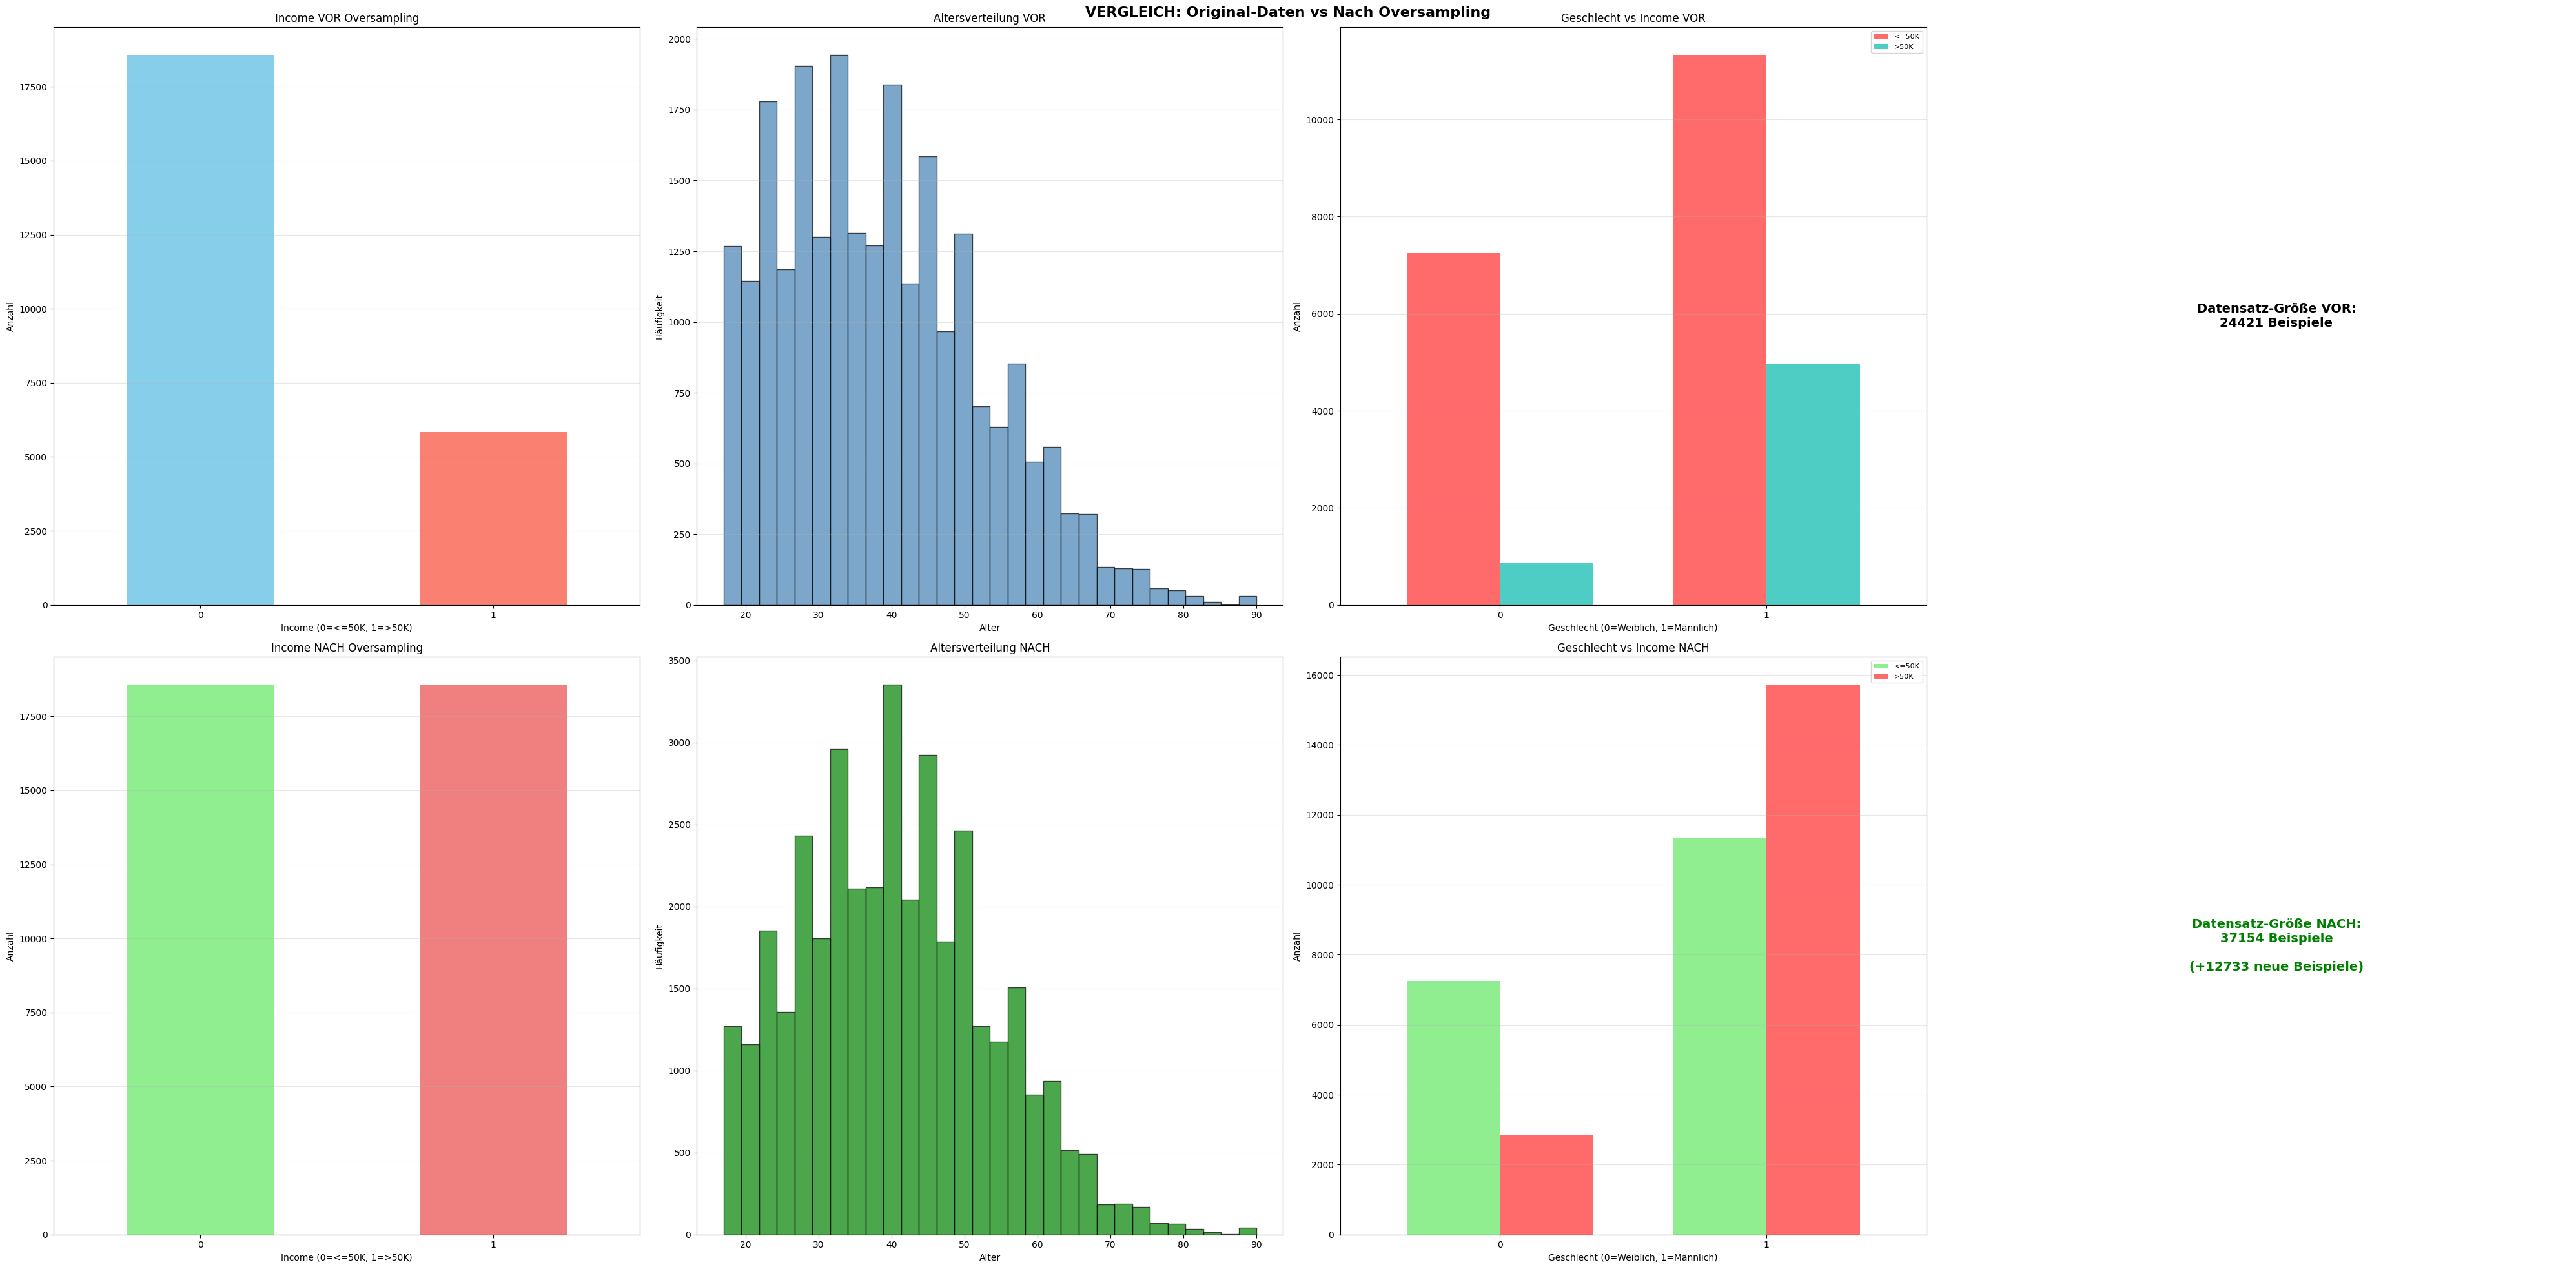

In [18]:
# ============================================================================
# SCHRITT 15: VERGLEICHSVISUALISIERUNGEN - VORHER/NACHHER
# ============================================================================
print("\n" + "=" * 70)
print("SCHRITT 15: VISUALISIERUNG - VERGLEICH VORHER/NACHHER OVERSAMPLING")
print("=" * 70)

# Erstellt großes Vergleichsdiagramm mit 2 Zeilen und 4 Spalten
fig, axes = plt.subplots(2, 4, figsize=(40, 20))
fig.suptitle('VERGLEICH: Original-Daten vs Nach Oversampling',
             fontsize=16, fontweight='bold')

# ZEILE 1: VOR OVERSAMPLING
# --- Chart 1: Income-Verteilung VOR ---
y_train_new.value_counts().plot(kind='bar', ax=axes[0, 0],
                                color=['skyblue', 'salmon'])
axes[0, 0].set_title('Income VOR Oversampling')
axes[0, 0].set_xlabel('Income (0=<=50K, 1=>50K)')
axes[0, 0].set_ylabel('Anzahl')
axes[0, 0].tick_params(axis='x', rotation=0)
axes[0, 0].grid(axis='y', alpha=0.3)

# --- Chart 2: Altersverteilung VOR ---
axes[0, 1].hist(X_train_new['age'], bins=30, color='steelblue',
                edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Altersverteilung VOR')
axes[0, 1].set_xlabel('Alter')
axes[0, 1].set_ylabel('Häufigkeit')
axes[0, 1].grid(axis='y', alpha=0.3)

# --- Chart 3: Geschlecht vs Income VOR ---
train_data_before = pd.concat([X_train_new, y_train_new], axis=1)
gender_income_before = pd.crosstab(train_data_before['gender'],
                                    train_data_before['income'])
gender_income_before.plot(kind='bar', ax=axes[0, 2],
                          color=['#FF6B6B', '#4ECDC4'], width=0.7)
axes[0, 2].set_title('Geschlecht vs Income VOR')
axes[0, 2].set_xlabel('Geschlecht (0=Weiblich, 1=Männlich)')
axes[0, 2].set_ylabel('Anzahl')
axes[0, 2].legend(['<=50K', '>50K'], fontsize=8)
axes[0, 2].tick_params(axis='x', rotation=0)
axes[0, 2].grid(axis='y', alpha=0.3)

# --- Chart 4: Datensatz-Größe VOR ---
axes[0, 3].text(0.5, 0.5,
                f'Datensatz-Größe VOR:\n{len(X_train_new)} Beispiele',
                ha='center', va='center', fontsize=14, fontweight='bold')
axes[0, 3].axis('off')

# ZEILE 2: NACH OVERSAMPLING
# --- Chart 5: Income-Verteilung NACH ---
y_resampled.value_counts().plot(kind='bar', ax=axes[1, 0],
                                color=['lightgreen', 'lightcoral'])
axes[1, 0].set_title('Income NACH Oversampling')
axes[1, 0].set_xlabel('Income (0=<=50K, 1=>50K)')
axes[1, 0].set_ylabel('Anzahl')
axes[1, 0].tick_params(axis='x', rotation=0)
axes[1, 0].grid(axis='y', alpha=0.3)

# --- Chart 6: Altersverteilung NACH ---
axes[1, 1].hist(X_resampled['age'], bins=30, color='green',
                edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Altersverteilung NACH')
axes[1, 1].set_xlabel('Alter')
axes[1, 1].set_ylabel('Häufigkeit')
axes[1, 1].grid(axis='y', alpha=0.3)

# --- Chart 7: Geschlecht vs Income NACH ---
data_resampled_full = pd.concat([X_resampled, y_resampled], axis=1)
gender_income_after = pd.crosstab(data_resampled_full['gender'],
                                   data_resampled_full['income'])
gender_income_after.plot(kind='bar', ax=axes[1, 2],
                         color=['#90EE90', '#FF6B6B'], width=0.7)
axes[1, 2].set_title('Geschlecht vs Income NACH')
axes[1, 2].set_xlabel('Geschlecht (0=Weiblich, 1=Männlich)')
axes[1, 2].set_ylabel('Anzahl')
axes[1, 2].legend(['<=50K', '>50K'], fontsize=8)
axes[1, 2].tick_params(axis='x', rotation=0)
axes[1, 2].grid(axis='y', alpha=0.3)

# --- Chart 8: Datensatz-Größe NACH ---
difference = len(X_resampled) - len(X_train_new)
axes[1, 3].text(0.5, 0.5,
                f'Datensatz-Größe NACH:\n{len(X_resampled)} Beispiele\n\n(+{difference} neue Beispiele)',
                ha='center', va='center', fontsize=14, fontweight='bold',
                color='green')
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()


SCHRITT 16: DETAILLIERTE GESCHLECHTER-VERTEILUNG


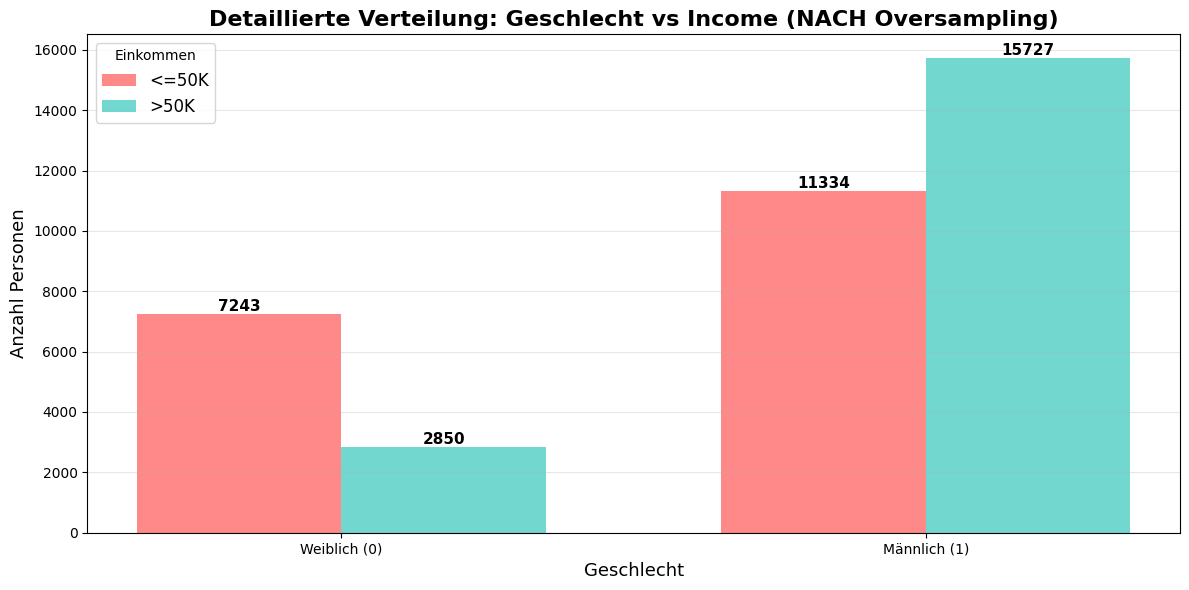

In [19]:
# ============================================================================
# SCHRITT 16: DETAILLIERTE GESCHLECHTER-ANALYSE
# ============================================================================
print("\n" + "=" * 70)
print("SCHRITT 16: DETAILLIERTE GESCHLECHTER-VERTEILUNG")
print("=" * 70)

fig, ax = plt.subplots(figsize=(12, 6))

# Bereitet Daten für Side-by-Side Balkendiagramm vor
income_0 = data_resampled_full[data_resampled_full['income'] == 0]['gender'].value_counts().sort_index()
income_1 = data_resampled_full[data_resampled_full['income'] == 1]['gender'].value_counts().sort_index()

x = np.arange(len(income_0))
width = 0.35

# Erstellt zwei Balkengruppen
bars1 = ax.bar(x - width/2, income_0, width, label='<=50K',
               color='#FF6B6B', alpha=0.8)
bars2 = ax.bar(x + width/2, income_1, width, label='>50K',
               color='#4ECDC4', alpha=0.8)

# Fügt Zahlenwerte auf Balken hinzu
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_title('Detaillierte Verteilung: Geschlecht vs Income (NACH Oversampling)',
             fontsize=16, fontweight='bold')
ax.set_xlabel('Geschlecht', fontsize=13)
ax.set_ylabel('Anzahl Personen', fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(['Weiblich (0)', 'Männlich (1)'])
ax.legend(title='Einkommen', fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


In [20]:
# ----------------------------------------------------------------------------
# ZUSÄTZLICHER SCHRITT: RANDOM FOREST MIT OVERSAMPLETEN DATEN TRAINIEREN
# ----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("TRAINIERE RANDOM FOREST MODELL MIT OVERSAMPLETEN DATEN")
print("=" * 70)

# Erstellt ein Random Forest Klassifikationsmodell
# class_weight='balanced' ist hier weniger kritisch, da die Daten bereits balanciert sind
model_rf_oversampled = RandomForestClassifier(
    random_state=42,  # Für Reproduzierbarkeit
    n_estimators=100  # 100 Bäume im Wald
)

print("🌲 Trainiere Random Forest Modell auf oversampleten Daten...")
model_rf_oversampled.fit(X_resampled, y_resampled)
print("✅ Training abgeschlossen!")

# Macht Vorhersagen auf dem UNVERÄNDERTEN Testset
y_pred_oversampled = model_rf_oversampled.predict(X_test_new)
y_pred_proba_oversampled = model_rf_oversampled.predict_proba(X_test_new)



TRAINIERE RANDOM FOREST MODELL MIT OVERSAMPLETEN DATEN
🌲 Trainiere Random Forest Modell auf oversampleten Daten...
✅ Training abgeschlossen!



VERGLEICH DER FEATURE IMPORTANCE


,Original_Feature,Original_Importance,Oversampled_Feature,Oversampled_Importance
0,age,0.163896,age,0.166043
2,fnlwgt,0.143336,fnlwgt,0.146406
7,relationship,0.119644,relationship,0.136888
5,marital-status,0.116778,marital-status,0.104933
4,educational-num,0.085498,educational-num,0.084031
12,hours-per-week,0.082171,hours-per-week,0.083765
10,capital-gain,0.081533,capital-gain,0.073497
6,occupation,0.064663,occupation,0.062063
3,education,0.035365,education,0.035805
1,workclass,0.034278,workclass,0.034322



Grafische Darstellung des Vergleichs:


/tmp/ipython-input-235333273.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-235333273.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


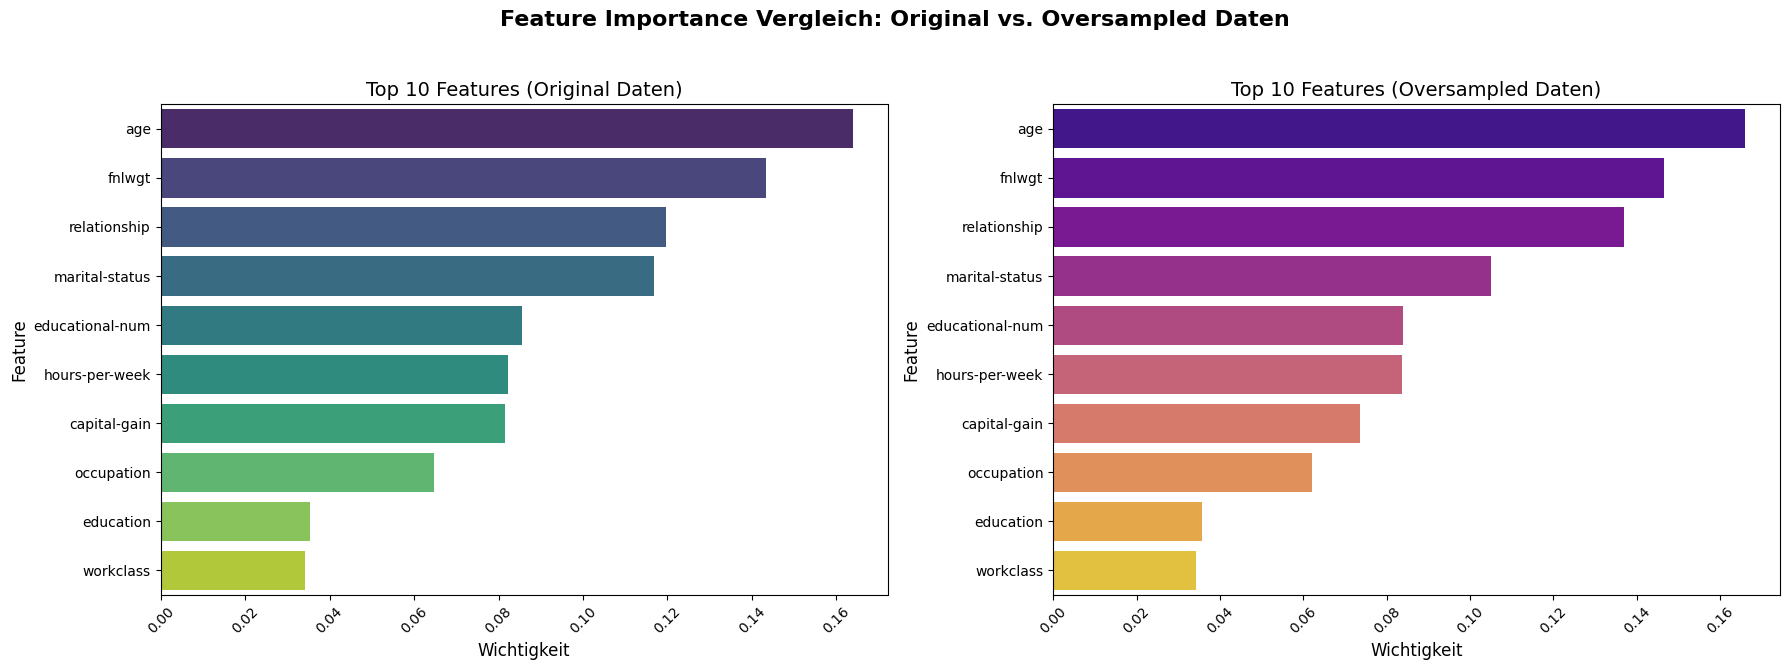

In [21]:
# ----------------------------------------------------------------------------
# VERGLEICH DER FEATURE IMPORTANCE (ORIGINAL vs. OVERSAMPLED)
# ----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("VERGLEICH DER FEATURE IMPORTANCE")
print("=" * 70)

# Feature Importance vom ursprünglichen Modell (aus Schritt 13)
original_feature_imp = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_rf.feature_importances_
}).sort_values('importance', ascending=False)

# Feature Importance vom Modell mit oversampleten Daten (aus dem vorherigen Schritt)
oversampled_feature_imp = pd.DataFrame({
    'feature': X_resampled.columns,
    'importance': model_rf_oversampled.feature_importances_
}).sort_values('importance', ascending=False)

# Zeigt die Top 10 Features beider Modelle nebeneinander an
comparison_df = pd.DataFrame({
    'Original_Feature': original_feature_imp['feature'].head(10),
    'Original_Importance': original_feature_imp['importance'].head(10),
    'Oversampled_Feature': oversampled_feature_imp['feature'].head(10),
    'Oversampled_Importance': oversampled_feature_imp['importance'].head(10)
})
display(comparison_df)

print("\nGrafische Darstellung des Vergleichs:")

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Feature Importance Vergleich: Original vs. Oversampled Daten', fontsize=16, fontweight='bold')

# Original Modell
sns.barplot(
    x='importance',
    y='feature',
    data=original_feature_imp.head(10),
    ax=axes[0],
    palette='viridis'
)
axes[0].set_title('Top 10 Features (Original Daten)', fontsize=14)
axes[0].set_xlabel('Wichtigkeit', fontsize=12)
axes[0].set_ylabel('Feature', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Oversampled Modell
sns.barplot(
    x='importance',
    y='feature',
    data=oversampled_feature_imp.head(10),
    ax=axes[1],
    palette='plasma'
)
axes[1].set_title('Top 10 Features (Oversampled Daten)', fontsize=14)
axes[1].set_xlabel('Wichtigkeit', fontsize=12)
axes[1].set_ylabel('Feature', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [25]:
print("\n" + "=" * 70)
print("SCHRITT 17: MODELL-EVALUATION MIT OVERSAMPLETEN DATEN")
print("=" * 70)

# Berechnet die Accuracy für das Modell, das mit oversampleten Daten trainiert wurde
accuracy_oversampled = accuracy_score(y_test_new, y_pred_oversampled)
print(f"📊 Accuracy (Oversampled Modell): {accuracy_oversampled:.4f} ({accuracy_oversampled*100:.2f}%)\n")

# Optional: Detaillierter Classification Report
print("📋 Detaillierter Classification Report (Oversampled Modell):")
report_oversampled_dict = classification_report(y_test_new, y_pred_oversampled, target_names=['<=50K', '>50K'], output_dict=True)
report_oversampled_df = pd.DataFrame(report_oversampled_dict).transpose()
display(report_oversampled_df)

# Optional: ROC-AUC Score
roc_auc_oversampled = roc_auc_score(y_test_new, y_pred_proba_oversampled[:, 1])
print(f"\n📈 ROC-AUC Score (Oversampled Modell): {roc_auc_oversampled:.4f}")


SCHRITT 17: MODELL-EVALUATION MIT OVERSAMPLETEN DATEN
📊 Accuracy (Oversampled Modell): 0.8528 (85.28%)

📋 Detaillierter Classification Report (Oversampled Modell):


,precision,recall,f1-score,support
<=50K,0.900256,0.907041,0.903636,18578.000000
>50K,0.697177,0.680472,0.688723,5843.000000
accuracy,0.852832,0.852832,0.852832,0.852832
macro avg,0.798717,0.793756,0.796180,24421.000000
weighted avg,0.851667,0.852832,0.852216,24421.000000



📈 ROC-AUC Score (Oversampled Modell): 0.9049


In [22]:
# # ============================================================================
# # SCHRITT 17: KORRELATIONSMATRIX DER NEUEN DATEN
# # ============================================================================
# print("\n" + "=" * 70)
# print("SCHRITT 17: KORRELATIONSMATRIX NACH OVERSAMPLING")
# print("=" * 70)

# # Berechnet Korrelation für die balancierten Daten
# corr_matrix_new = data_resampled_full.corr(numeric_only=True)

# plt.figure(figsize=(14, 12))
# sns.heatmap(
#     corr_matrix_new,
#     cmap='magma',  # Farbschema
#     center=0,  # Zentriert bei 0
#     annot=False,  # Keine Zahlenwerte (zu viele Features)
#     square=True,  # Quadratische Zellen
#     linewidths=0.5,  # Linienbreite zwischen Zellen
#     cbar_kws={"shrink": 0.8}  # Größe der Farbskala
# )
# plt.title('Korrelationsmatrix NACH Oversampling',
#           fontsize=16, fontweight='bold', pad=20)
# plt.tight_layout()
# plt.show()

# print("\n" + "=" * 70)
# print("✅ ANALYSE VOLLSTÄNDIG ABGESCHLOSSEN!")
# print("=" * 70)
# print("\n📊 Zusammenfassung:")
# print(f"   • Original Datensatz: {data.shape[0]} Zeilen, {data.shape[1]} Spalten")
# print(f"   • Features für Modell: {len(feature_names)}")
# print(f"   • Random Forest Modell: {model_rf.n_estimators} Bäume")
# print(f"   • Modell-Genauigkeit: {accuracy*100:.2f}%")
# print(f"   • ROC-AUC Score: {roc_auc:.4f}")
# print(f"   • Nach Oversampling: {len(X_resampled)} Trainingsbeispiele (balanciert)")
# print("\n🎯 Das Modell kann nun verwendet werden, um Einkommensvorhersagen zu treffen!")
# print("=" * 70)